In [1]:
# Attribute Information:
#Given are the variable name, variable type, the measurement unit and a brief description.
#The concrete compressive strength is the regression problem. The order of this listing
#corresponds to the order of numerals along the rows of the database.

In [2]:
# Name -- Data Type -- Measurement -- Description
# Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
# Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
# Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
# Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
# Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
# Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
# Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
# Age(age) -- quantitative -- Day (1~365) -- Input Variable
# Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [3]:
# Exploratory data quality report reflecting the following:

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
import os,sys
from scipy import stats
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
## Univariate analysis – data types and description of the independent attributes which should include:
   # name, range of values observed, central values (mean and median), 
   # standard deviation and quartiles, 
   # analysis of the body of distributions /tails, missing values, outliers, duplicates (10 Marks)

In [6]:
# Loading the dataset
df = pd.read_csv('concrete.csv')
df.head()
df.tail()
df.shape

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


(1030, 9)

In [7]:
# Check datatype
df.info()

# Insight:
      # No Null values observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.describe().T

# Insight:
         # 50% of the slag values lies below 22 kg 
         # age is highly skewed. median age is 28 days. 50% of the values lie between 23-46 days
         # 50% of the samples values concrete strength lies between 23 - 46 Mpa

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
df.skew()

# Insight:
           #Only age is highly skewed on the right side. 
           #Other input variables are relatively less skewed. 
           #Coarse aggregate and fine aggregate are negatively skewed 

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

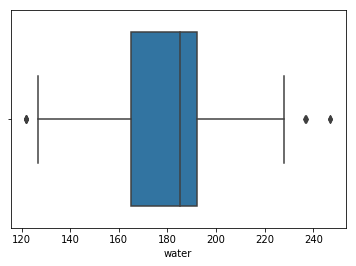

In [10]:
# plotting box plots to identify the outliers for the selected columns: water, superplastic, fineagg and age

# Insight:
        # Outliers observed in the variable age , water , superplastic
sns.boxplot(df['water'])

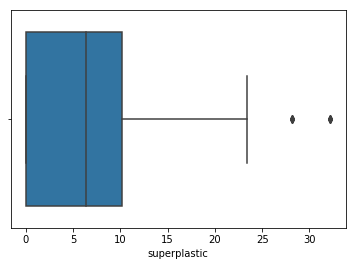

In [11]:
sns.boxplot(df['superplastic'])

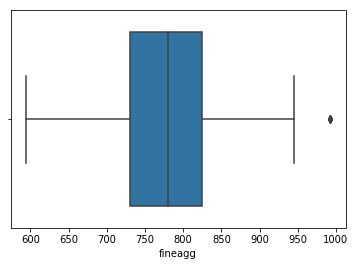

In [12]:
sns.boxplot(df['fineagg'])

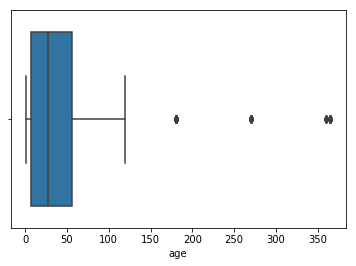

In [13]:
sns.boxplot(df['age'])

C:\Program Files\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


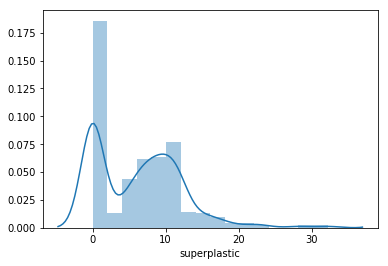

In [14]:
sns.distplot(df['superplastic'])
plt.show()

C:\Program Files\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


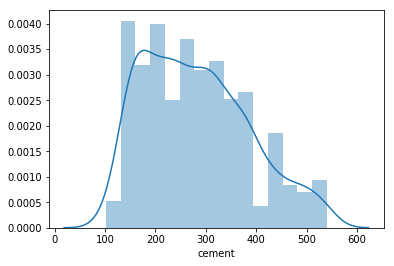

In [15]:
sns.distplot(df['cement'])
plt.show()

In [16]:
len(df.loc[df['slag']==0])
len(df.loc[df['ash']==0])
len(df.loc[df['superplastic']==0])
len(df.loc[(df['superplastic']==0) | (df['ash']==0) | (df['slag']==0)])

# Insight
    # Around 30- 50% of the samples have zero values for Slag, ash & superplastic.
    # Potentially they didn't use slag and ash

471

566

379

805

In [17]:
#Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their
#relationship and degree of relation if any. Visualize the analysis using boxplots and
#pair plots, histograms or density curves. (10 marks)

In [18]:
df.corr()
# Insight:
   # Range considered for moderate correlation: 0.3-0.7
   # Moderate Positive Correlation between: ash & superplastic, 
   # Moderate Negative Correlation between: cement & ash, slag & ash, water and superplastic, water & fineagg  
   # Moderate Positive Correlation between Input and Output variable: cement & strength, superplastic & strength, age & strength
   # for rest of the variables weak correlation observed
   # Also, Age and Super Plasticizer are the other two factors influencing Compressive strength
   # It is evident that cement and age, superplastic have good positive corr with strength, 
     #cement being the strong predictor Water has a good negative correlation with Strength, 
     #where are there are other variables with very less correlation 
        # there are good correlation among variables 
              #: cement -> Slag = -ve relation and strength-> +ve Slag -> ash and fineaggg = -ve Water -> superplastic , fineagg strength = -ve superplastic -> ash 
     #and Strength positive correlation between water and slag age -> Strength and water


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


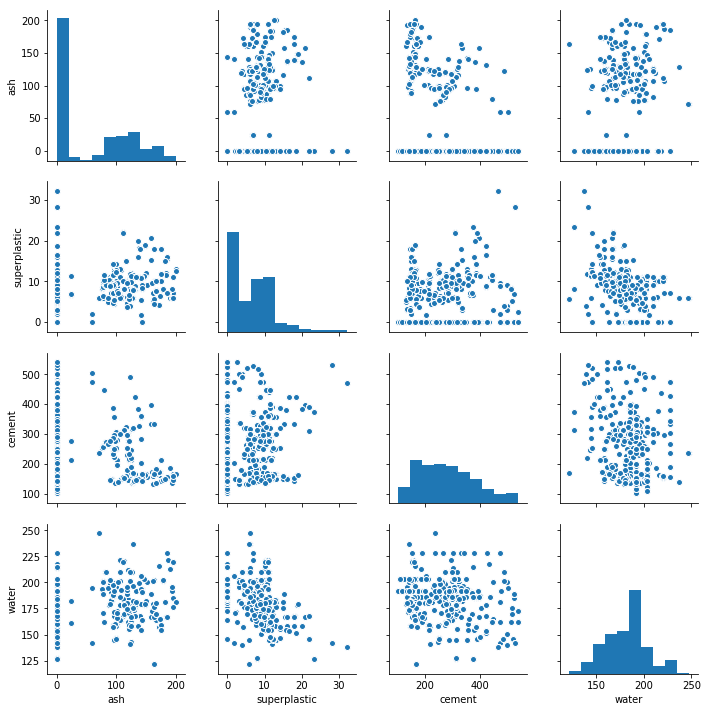

In [19]:
sns.pairplot(df[['ash','superplastic','cement','water']])

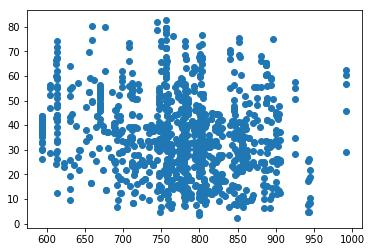

In [20]:
plt.scatter(df['fineagg'],df['strength']);

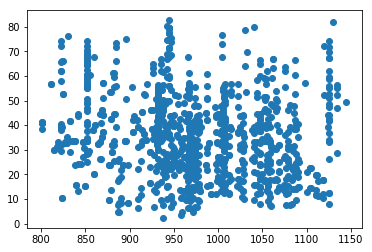

In [21]:
plt.scatter(df['coarseagg'],df['strength']);

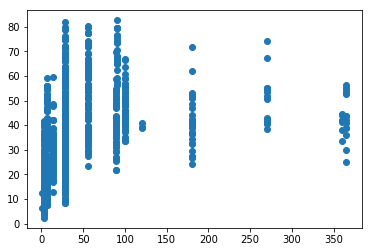

In [22]:
plt.scatter(df['age'],df['strength']);

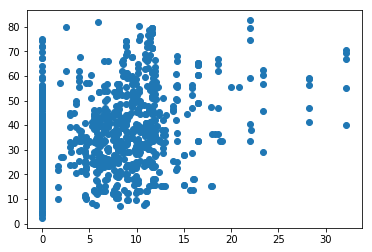

In [23]:
plt.scatter(df['superplastic'],df['strength']);

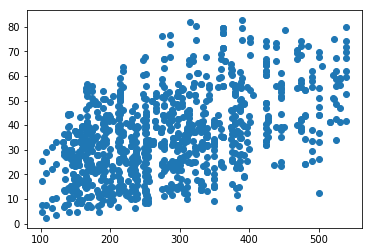

In [24]:
plt.scatter(df['cement'],df['strength']);

In [25]:
#Feature Engineering techniques (10 marks)
#a. Identify opportunities (if any) to extract a new feature from existing features,drop a feature (if required)
#b. Get data model ready and do a train test split.
#c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

In [26]:
# a. Opportunities for the new features

#  various feature engineering techniques like imputation, handling outliers, transforming the data, binning and scaling can be 
  # used to handle this problem statement
# Need to evaluate if feature grouping can be used for this project
# I have used Min Max Scaler to transform all the variables to one scale. 
# Planning to handle the outliers for variables like Age, water and superplastic
    
#  Apart from the component types, the properties of concrete are influenced by the mixing proportions & mixing preparation technique
#  No details on mixing technqiues not covered in the dataset
#  No details on superplastic manufacturers / different chemical compositions covered in the dataset
#  The database often contains unexpected inaccuracies, for instance, the class of fly ash is not reported. 

# c. Factors to decide the complexity of the model required to map the relationship between the input and output variables

# Non-Linear relationships observed between the input and output variables [ refer; correlation results]
# Non-Linear relationships observed between the independent variables [ refer; correlation results]
# Hence, we need to consider a model which helps in discovering these non-linear relationships
    # and interactions between various independent variables
# We can extend linear models to capture any non-linear relationship. Typically, this is done by explicitly including polynomial terms (e.g., Square terms) 
   # or step functions to capture the non-linear relationships
# step functions break the range of X variables into bins, and fit a simple constant (e.g., the mean response) in each variable

# For example Multivariate adaptive regression splines (MARS) 
   # provide a convenient approach to capture the nonlinear relationships in the data by assessing cutpoints (knots) 
   # similar to step functions and can be used to create a model for predicting concrete mixture compressive strength

# So far the EDA highlights that the concrete variable has a potential impact on the compressive strength of the concrete
  # followed by fine aggregate, coarse aggregate,ash, water, slag, age in days and superplasticizer


In [27]:
#b. Get the model ready and do train test split
#The features can be normalized using MinMax Scaler so that all variables are in the same scale
    # i.e. all the features fall into the same range.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
x = df.iloc[:,:-1] # Features 
y = df.iloc[:,-1] # Target 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2) 
sc = MinMaxScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)
x_train.shape
y_train.shape
x_train[0,:]

(721, 8)

(721,)

array([0.06849315, 0.57456873, 0.8045    , 0.45643485, 0.17080745,
       0.19156977, 0.35524335, 0.07417582])

In [28]:
# Creating the model and tuning it

In [29]:
# 1. Algorithms that you think will be suitable for this project. Use Kfold Cross Validation to evaluate model performance. 
      # Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics.
      # (at least 3 algorithms, one bagging and one boosting based algorithms has to be there). (15 marks)
      # As this is a regression problem to predict compressive strength of the concrete we will use Linear regression, 
          # its variants- Lasso , ridge , decision tree and random forest
        
## Steps Taken

# Models Selected for this project
    # Linear Regression, Lasso / Ridge Regression, Decision Tree, Random Forest, bagging and Adaptive boosting
# Kfold Cross validation used for each model to evaluate the model performance
# Feature importance plotted for models - Decision Tree, Random Forest, Adaptive boosting
# Hyper parameter tuning done by using Grid SearchCV for Decision Tree and Random Forest.

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [31]:
lr = LinearRegression() 
lasso = Lasso(alpha=0.001) 
ridge = Ridge()

In [32]:
# fit model
lr.fit(x_train, y_train) 
lasso.fit(x_train, y_train) 
ridge.fit(x_train, y_train)
lr.score(x_train, y_train)
lasso.score(x_train, y_train)
ridge.score(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

0.5806768989409723

0.5806706052223906

0.5774013853953305

In [33]:
y_pred_lr = lr.predict(x_test) 
y_pred_lasso = lasso.predict(x_test) 
y_pred_ridge = ridge.predict(x_test)

In [34]:
resultsDf = pd.DataFrame({'Method':['Linear Regression'], 
                          'RMSE_Test':np.sqrt(mean_squared_error(y_pred_lr, y_test)),'R2_Score_Test':r2_score(y_test, y_pred_lr)})
resultsDf = resultsDf[['Method', 'RMSE_Test','R2_Score_Test']]
resultsDf

,Method,RMSE_Test,R2_Score_Test
0,Linear Regression,9.826479,0.682482


In [35]:
tempResultsDf = pd.DataFrame({'Method':['Lasso Regression'], 
                          'RMSE_Test':np.sqrt(mean_squared_error(y_pred_lasso, y_test)),'R2_Score_Test':r2_score(y_test, y_pred_lasso)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE_Test','R2_Score_Test']]
resultsDf

,Method,RMSE_Test,R2_Score_Test
0,Linear Regression,9.826479,0.682482
0,Lasso Regression,9.829723,0.682273


In [36]:
tempResultsDf = pd.DataFrame({'Method':['Ridge Regression'], 
                          'RMSE_Test':np.sqrt(mean_squared_error(y_pred_ridge, y_test)),'R2_Score_Test':r2_score(y_test, y_pred_ridge)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE_Test','R2_Score_Test']]
resultsDf

,Method,RMSE_Test,R2_Score_Test
0,Linear Regression,9.826479,0.682482
0,Lasso Regression,9.829723,0.682273
0,Ridge Regression,9.988228,0.671943


In [37]:
# Evaluate using Cross Validation - Linear , Lasso & Ridge Regression

from sklearn import model_selection

seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

model = LinearRegression()


results = model_selection.cross_val_score(model, x, y, scoring='r2', cv=kfold)

print("Linear Regression Cross Val r2 score: Mean:%.3f (Std Dev:%.3f)" % (results.mean()*100, results.std()*100))

Linear Regression Cross Val r2 score: Mean:58.955 (Std Dev:9.710)


In [38]:
from sklearn import model_selection

seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

model = lasso

results = model_selection.cross_val_score(model, x, y, scoring='r2', cv=kfold)
print("Lasso Regression Cross Val r2 score: Mean:%.3f (Std Dev:%.3f)" % (results.mean()*100, results.std()*100))

Lasso Regression Cross Val r2 score: Mean:58.955 (Std Dev:9.710)


In [39]:
from sklearn import model_selection

seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

model = ridge

results = model_selection.cross_val_score(model, x, y, scoring='r2', cv=kfold)
print("Ridge Regression Cross Val r2 score: Mean:%.3f (Std Dev:%.3f)" % (results.mean()*100, results.std()*100))

Ridge Regression Cross Val r2 score: Mean:58.955 (Std Dev:9.710)


In [40]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test) 

tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 
                          'RMSE_Test':np.sqrt(mean_squared_error(y_pred_dtr, y_test)),'R2_Score_Test':r2_score(y_test, y_pred_dtr)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE_Test','R2_Score_Test']]
resultsDf

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

,Method,RMSE_Test,R2_Score_Test
0,Linear Regression,9.826479,0.682482
0,Lasso Regression,9.829723,0.682273
0,Ridge Regression,9.988228,0.671943
0,Decision Tree,6.702577,0.852274


In [41]:
from sklearn import model_selection

seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

model = dtr

results = model_selection.cross_val_score(model, x, y, scoring='r2', cv=kfold)
print("Decision Tree Cross Val r2 score: Mean:%.3f (Std Dev:%.3f)" % (results.mean()*100, results.std()*100))

Decision Tree Cross Val r2 score: Mean:86.918 (Std Dev:5.301)


<Figure size 864x864 with 0 Axes>

Text(0.5,1,'Feature importances')

<BarContainer object of 8 artists>

([<matplotlib.axis.XTick at 0xe26b2e8>,
 <a list of 8 Text xticklabel objects>)

(-1, 8)

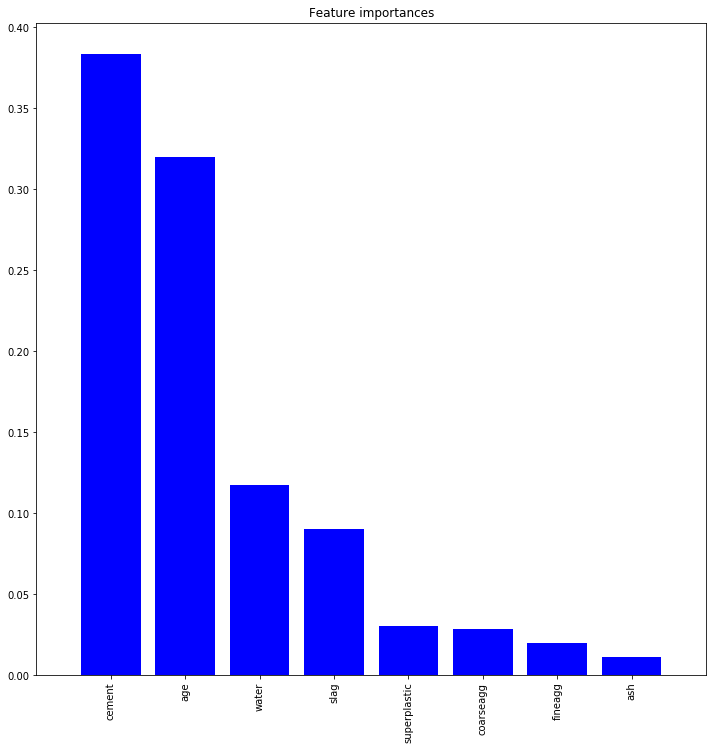

In [42]:
# Feature Importance - Decision Tree
feat_names = x.columns.values
#print(feat_names)
## plot the importances ##
importances = dtr.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="b", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [43]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=200) 
rfr.fit(x_train, y_train) 
y_pred_rfr = rfr.predict(x_test) 

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 
                          'RMSE_Test':np.sqrt(mean_squared_error(y_pred_rfr, y_test)),'R2_Score_Test':r2_score(y_test, y_pred_rfr)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE_Test','R2_Score_Test']]
resultsDf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

,Method,RMSE_Test,R2_Score_Test
0,Linear Regression,9.826479,0.682482
0,Lasso Regression,9.829723,0.682273
0,Ridge Regression,9.988228,0.671943
0,Decision Tree,6.702577,0.852274
0,Random Forest,5.617257,0.896242


In [44]:
from sklearn import model_selection

seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

model = rfr

results = model_selection.cross_val_score(rfr, x, y, scoring='r2', cv=kfold)
print("Random Forest Cross Val r2 score: Mean:%.3f (Std Dev:%.3f)" % (results.mean()*100, results.std()*100))

Random Forest Cross Val r2 score: Mean:92.001 (Std Dev:2.963)


<Figure size 864x864 with 0 Axes>

Text(0.5,1,'Feature importances')

<BarContainer object of 8 artists>

([<matplotlib.axis.XTick at 0xd1584a8>,
 <a list of 8 Text xticklabel objects>)

(-1, 8)

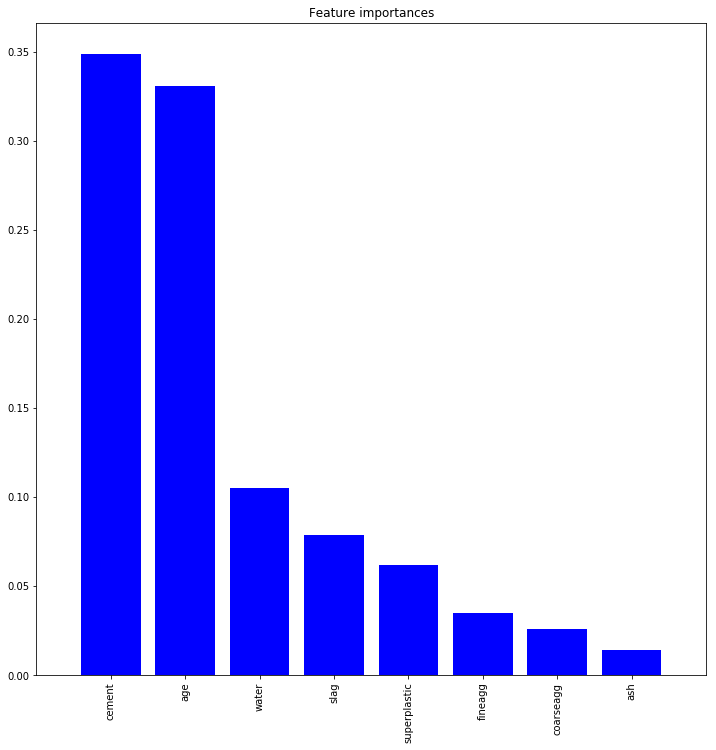

In [45]:
# Feature Importance - Random Forest
feat_names = x.columns.values
#print(feat_names)
## plot the importances ##
importances = rfr.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="b", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [46]:
from sklearn.ensemble import BaggingRegressor

bgcl1 = BaggingRegressor(base_estimator=dtr, n_estimators=50,random_state=1)
bgcl1 = bgcl1.fit(x_train, y_train)
y_pred_bdr = bgcl1.predict(x_test)

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 
                          'RMSE_Test':np.sqrt(mean_squared_error(y_pred_bdr, y_test)),'R2_Score_Test':r2_score(y_test, y_pred_bdr)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE_Test','R2_Score_Test']]
resultsDf

,Method,RMSE_Test,R2_Score_Test
0,Linear Regression,9.826479,0.682482
0,Lasso Regression,9.829723,0.682273
0,Ridge Regression,9.988228,0.671943
0,Decision Tree,6.702577,0.852274
0,Random Forest,5.617257,0.896242
0,Bagging,5.597693,0.896964


In [47]:
from sklearn import model_selection

seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

model = bgcl1

results = model_selection.cross_val_score(model, x, y, scoring='r2', cv=kfold)
print("Bagging Cross Val r2 score: Mean:%.3f (Std Dev:%.3f)" % (results.mean()*100, results.std()*100))
# CV_R Squared Mean , CV_R Squared Std.Dev

Bagging Cross Val r2 score: Mean:92.043 (Std Dev:2.963)


In [48]:
from sklearn.ensemble import AdaBoostRegressor

abcl1 = AdaBoostRegressor(base_estimator=dtr, n_estimators=10,random_state=1)
abcl1 = abcl1.fit(x_train, y_train)
y_pred_abdr = abcl1.predict(x_test)

tempResultsDf = pd.DataFrame({'Method':['Adaptive Boosting'], 
                          'RMSE_Test':np.sqrt(mean_squared_error(y_pred_abdr, y_test)),'R2_Score_Test':r2_score(y_test, y_pred_abdr)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE_Test','R2_Score_Test']]
resultsDf

,Method,RMSE_Test,R2_Score_Test
0,Linear Regression,9.826479,0.682482
0,Lasso Regression,9.829723,0.682273
0,Ridge Regression,9.988228,0.671943
0,Decision Tree,6.702577,0.852274
0,Random Forest,5.617257,0.896242
0,Bagging,5.597693,0.896964
0,Adaptive Boosting,6.295859,0.869659


<Figure size 864x864 with 0 Axes>

Text(0.5,1,'Feature importances')

<BarContainer object of 8 artists>

([<matplotlib.axis.XTick at 0xc84f400>,
 <a list of 8 Text xticklabel objects>)

(-1, 8)

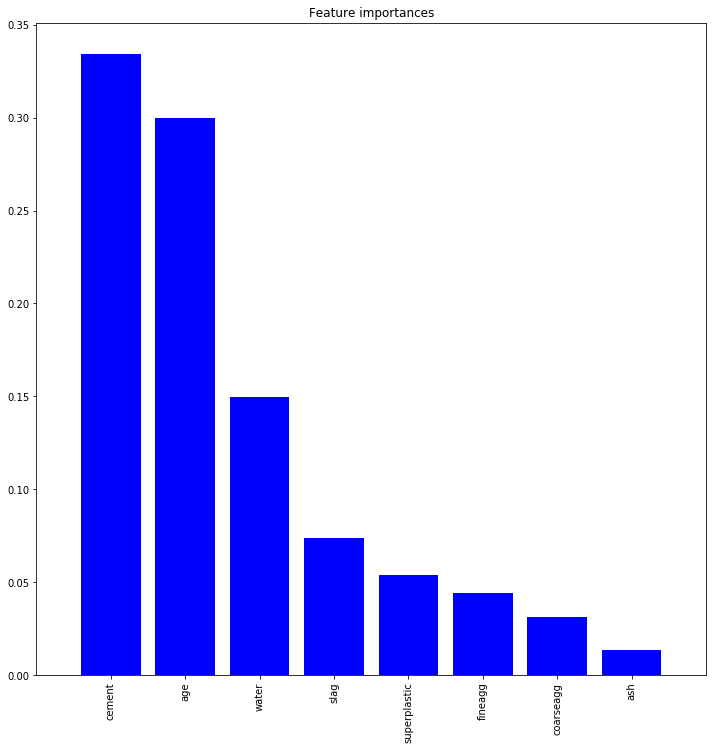

In [49]:
# Feature Importance - Adaptive Boosting
feat_names = x.columns.values
#print(feat_names)
## plot the importances ##
importances = abcl1.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="b", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [50]:
from sklearn import model_selection

seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

model = abcl1

results = model_selection.cross_val_score(model, x, y, scoring='r2', cv=kfold)
print("Adaptive Boosting Cross Val r2 score: Mean:%.3f (Std Dev:%.3f)" % (results.mean()*100, results.std()*100))

Adaptive Boosting Cross Val r2 score: Mean:90.714 (Std Dev:3.959)


In [51]:
#I have analysed the Compressive Strength Data and used Machine Learning to Predict the Compressive Strength of Concrete.
#I have used Linear Regression and its variations, Decision Trees and Random Forests 
   #to make predictions and compared their performance. 
#Random Forest Regressor has the lowest RMSE and is a good choice for this problem. 
# Also, we can further improve the performance of the algorithm by tuning the hyperparameters 
   #by performing a grid search or random search.

In [52]:
# 2. Techniques employed to squeeze that extra performance out of the model without making it over fit. 
     # Use Grid Search or Random Search on any of the two models used above. 
     # Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [53]:
# Techniques used to squeeze the extra performance out the models:
   # Hyper parameter tuning of 2 selected models - Decision tree and Random forest using Grid search to identify the parameters
   # Changed the values of alpha in lasso regression to improve the results and finally selected alpha = 0.001 [ Refer- in 68]
   # Changing the default hyperparameters of the models used above can improve the scores

In [54]:
# Use Grid search CV for hyperparameters tuning
# Improving the value 

In [55]:
# Using Grid Search on Decision Tree
from sklearn.model_selection import GridSearchCV
maxdepth = range(1,50)
minsampleaf = range(1,7)
param_grid = {
    'max_depth' : maxdepth,
    'min_samples_leaf' : minsampleaf
}
dtr_cv= GridSearchCV(estimator=dtr, param_grid=param_grid)
dtr_cv.fit(x_train, y_train)
print(dtr_cv.best_params_)
dtr_cv.score(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 50), 'min_samples_leaf': range(1, 7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'max_depth': 13, 'min_samples_leaf': 2}


0.9794970612742417

In [56]:
# Results after fine tuning the hyperparameters based on the best parameters identified through the Grid Search
from sklearn.tree import DecisionTreeRegressor 
#dtr1 = DecisionTreeRegressor(max_depth=22,min_samples_leaf=1) 
#dtr1.fit(x_train, y_train)
y_pred_dtr1 = dtr_cv.best_estimator_.predict(x_test) 

tempResultsDf = pd.DataFrame({'Method':['Decision Tree Hyper Parameter Tuned'], 
                          'RMSE_Test':np.sqrt(mean_squared_error(y_pred_dtr1, y_test)),'R2_Score_Test':r2_score(y_test, y_pred_dtr1)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE_Test','R2_Score_Test']]
resultsDf

,Method,RMSE_Test,R2_Score_Test
0,Linear Regression,9.826479,0.682482
0,Lasso Regression,9.829723,0.682273
0,Ridge Regression,9.988228,0.671943
0,Decision Tree,6.702577,0.852274
0,Random Forest,5.617257,0.896242
0,Bagging,5.597693,0.896964
0,Adaptive Boosting,6.295859,0.869659
0,Decision Tree Hyper Parameter Tuned,7.145898,0.832087


In [57]:
# Applying grid search to get the best parameters for Random Forest
# use a full grid over all parameters. Few of the parameters indented for computational reasons
param_grid = {"n_estimators": [200,300,400,500],
              #"max_features": ['auto',1, 3, 8],
              #"min_samples_split": [2, 3, 10],
              #"min_samples_leaf": [1, 3, 10],
              #"bootstrap": [True, False],
            }

# run randomized search
grid_search = GridSearchCV(rfr, param_grid=param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_
grid_search.best_estimator_
grid_search.score(x_train, y_train)
y_pred_rfr1 = grid_search.best_estimator_.predict(x_test) 

tempResultsDf = pd.DataFrame({'Method':['Random forest Hyper Parameter Tuned'], 
                          'RMSE_Test':np.sqrt(mean_squared_error(y_pred_rfr1, y_test)),'R2_Score_Test':r2_score(y_test, y_pred_rfr1)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE_Test','R2_Score_Test']]
resultsDf

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'n_estimators': 300}

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

0.9834940558302392

,Method,RMSE_Test,R2_Score_Test
0,Linear Regression,9.826479,0.682482
0,Lasso Regression,9.829723,0.682273
0,Ridge Regression,9.988228,0.671943
0,Decision Tree,6.702577,0.852274
0,Random Forest,5.617257,0.896242
0,Bagging,5.597693,0.896964
0,Adaptive Boosting,6.295859,0.869659
0,Decision Tree Hyper Parameter Tuned,7.145898,0.832087
0,Random forest Hyper Parameter Tuned,5.600210,0.896871


In [58]:
#Conclusion

 # EDA Analysis shows the concrete variable has a potential impact on the compressive strength of the concrete
  # followed by fine aggregate, coarse aggregate,ash, water, slag, age in days and superplasticizer

 # Feature importances as reflected from the Decision tree , Random forest and adaptive boosting highlight 
     # that the compressive strength of concrete have features like Cement, age, water, slag and superplastic 
     # of higher importance as compared to the others
    
 # R2 Score of the various deployed models reflect that bagging, random forest , adaptive boosting, 
   #decision tree show better results
    
 # Linear regression, Lasso and Ridge regression has shown ok results becuase of the non-linear relationships 
   # between the variables
    
# CV validation is used for every model to look at the accuracy of the model and get a view of the standard deviation score and 
   # to assess how the results of a statistical analysis will generalize to an independent data set
    
 # Hyper paramters of Decision Tree and Random Forest are fine tuned using Grid Search. 

 # Grid search looks for the best parameters that will give better results
    
 # Using Grid Search has brought minor changes to the original model results

 